Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)


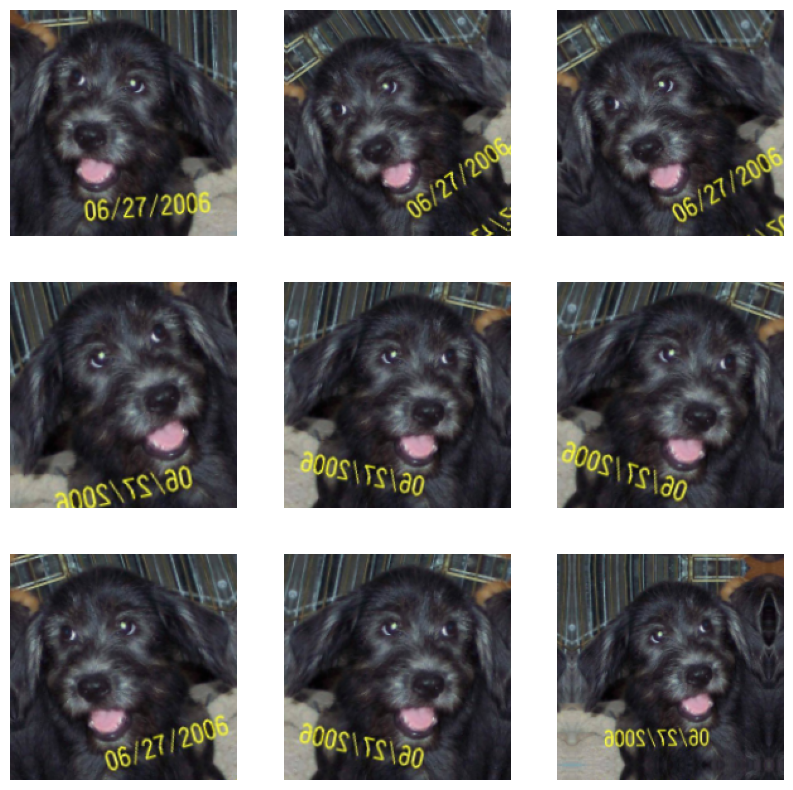

In [15]:
import keras
import keras.layers as layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import image_dataset_from_directory
import os, shutil, pathlib

new_base_dir = pathlib.Path("/home/binbin/dl/python_deep_learning/dogs-vs-cats-small")
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = (180, 180),
    batch_size = 32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = (180, 180),
    batch_size = 32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = (180, 180),
    batch_size = 32
)

data_augmentation = keras.Sequential([
     layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ])

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    print(images.shape)
    for i in range(9):
        augmented_images = data_augmentation(images)
        print(augmented_images.shape)
        ax = plt.subplot(3,3, i + 1)
        # plt.imshow(augmented_images[0].numpy().astype("uint8"))
        # plt.imshow(augmented_images[9])
        plt.imshow(augmented_images[1].numpy().astype("uint8"))
        plt.axis("off")